In [55]:
#read csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
import seaborn as sns

#analizuje defense i sp_defense vs typy pokemonow oraz zalezności od generacji

MAIN_DIR = 'C:\\bin\\infoshare\\homework_2_python\\' #sciezka do projektu
dataset = pd.read_csv(MAIN_DIR + 'pokemon.csv')
#df_better.to_csv(MAIN_DIR + 'pokemon_1v.csv')
#tmp = pd.read_csv(url, header=None)
#tmp.columns = column_names

#wyciagamy unikatowe typy pokemonow - lista
for i in ['generation','type1','type2']:
    print("{} => {}".format(i,dataset[i].unique()))

#liczymy srednia defense i sp_defense dla kazdego typu pokepomna
types = ['grass','fire', 'water', 'bug', 'normal', 'poison', 'electric', 'ground','fairy','fighting',
         'psychic', 'rock', 'ghost','ice', 'dragon', 'dark','steel', 'flying']
averages = {}
for t in types:
    avg = dataset.loc[(dataset['type1'].str.contains(t, case=False)) | (dataset['type2'].str.contains(t, case=False)), 'defense'].mean()
    averages[t] = avg
    print(f"Average defense for {t}: {avg}")
for t in types:
    avg = dataset.loc[(dataset['type1'].str.contains(t, case=False)) | (dataset['type2'].str.contains(t, case=False)), 'sp_defense'].mean()
    averages[t] = avg
    print(f"Average sp_defense for {t}: {avg}")

dataset


generation => [1 2 3 4 5 6 7]
type1 => ['grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric' 'ground'
 'fairy' 'fighting' 'psychic' 'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel'
 'flying']
type2 => ['poison' nan 'flying' 'dark' 'electric' 'ice' 'ground' 'fairy' 'grass'
 'fighting' 'psychic' 'steel' 'fire' 'rock' 'water' 'dragon' 'ghost' 'bug'
 'normal']
Average defense for grass: 71.73195876288659
Average defense for fire: 68.4375
Average defense for water: 75.22900763358778
Average defense for bug: 71.23376623376623
Average defense for normal: 59.477064220183486
Average defense for poison: 64.6875
Average defense for electric: 63.95744680851064
Average defense for ground: 85.5625
Average defense for fairy: 69.87234042553192
Average defense for fighting: 74.35849056603773
Average defense for psychic: 74.58536585365853
Average defense for rock: 104.54237288135593
Average defense for ghost: 79.70731707317073
Average defense for ice: 75.86842105263158
Average defense for dragon: 85.40

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [56]:
dataset.sort_values(by='sp_defense', ascending=False).tail(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
523,"['Sturdy', 'Weak Armor', 'Sand Force']",1.0,1.0,1.0,1.0,1.0,2.00,0.5,0.5,1.0,...,50.0,524,25,25,15,rock,NaN,18.0,5,0
97,"['Hyper Cutter', 'Shell Armor', 'Sheer Force']",1.0,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,...,50.0,98,25,25,50,water,NaN,6.5,1,0
267,['Shed Skin'],1.0,1.0,1.0,1.0,1.0,0.50,2.0,2.0,1.0,...,50.0,268,25,25,15,bug,NaN,11.5,3,0
265,['Shed Skin'],1.0,1.0,1.0,1.0,1.0,0.50,2.0,2.0,1.0,...,50.0,266,25,25,15,bug,NaN,10.0,3,0
292,"['Soundproof', 'Rattled']",1.0,1.0,1.0,1.0,1.0,2.00,1.0,1.0,0.0,...,50.0,293,51,23,28,normal,NaN,16.3,3,0
173,"['Cute Charm', 'Competitive', 'Friend Guard']",0.5,0.5,0.0,1.0,1.0,1.00,1.0,1.0,0.0,...,24.6,174,40,20,15,normal,fairy,1.0,2,0
12,"['Shield Dust', 'Run Away']",0.5,1.0,1.0,1.0,0.5,0.25,2.0,2.0,1.0,...,50.0,13,20,20,50,bug,poison,3.2,1,0
9,"['Shield Dust', 'Run Away']",1.0,1.0,1.0,1.0,1.0,0.50,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0
317,"['Rough Skin', 'Speed Boost']",2.0,0.5,1.0,2.0,2.0,2.00,0.5,1.0,0.5,...,50.0,318,65,20,65,water,dark,20.8,3,0
128,"['Swift Swim', 'Rattled']",1.0,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,...,50.0,129,15,20,80,water,NaN,10.0,1,0


In [57]:
dataset.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


<AxesSubplot:title={'center':'hist'}, ylabel='Frequency'>

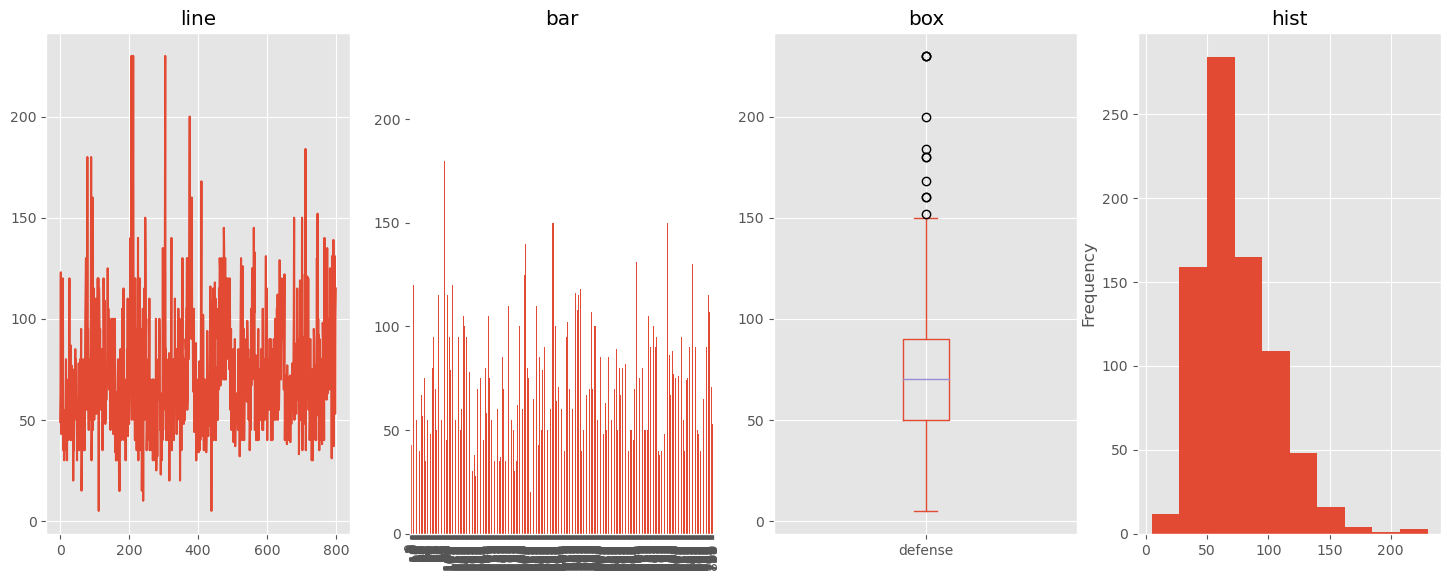

In [58]:
#import matplotlib.pyplot as plt
MAIN_DIR = 'C:\\bin\\infoshare\\homework_2_python\\' #sciezka do projektu
dataset = pd.read_csv(MAIN_DIR + 'pokemon.csv')

dataset

fig, axes = plt.subplots(1, 4, figsize=(18, 6.5))
dataset['defense'].plot(ax=axes[0], kind='line', title='line') #'line','hist','bar','barh','box','kde','density','area','pie'
dataset['defense'].plot(ax=axes[1], kind='bar', title='bar')
dataset['defense'].plot(ax=axes[2], kind='box', title='box')
dataset['defense'].plot(ax=axes[3], kind='hist', title='hist')


In [59]:
df = pd.DataFrame(dataset)
df.loc[["defense", "type1"]]
df

KeyError: "None of [Index(['defense', 'type1'], dtype='object')] are in the [index]"